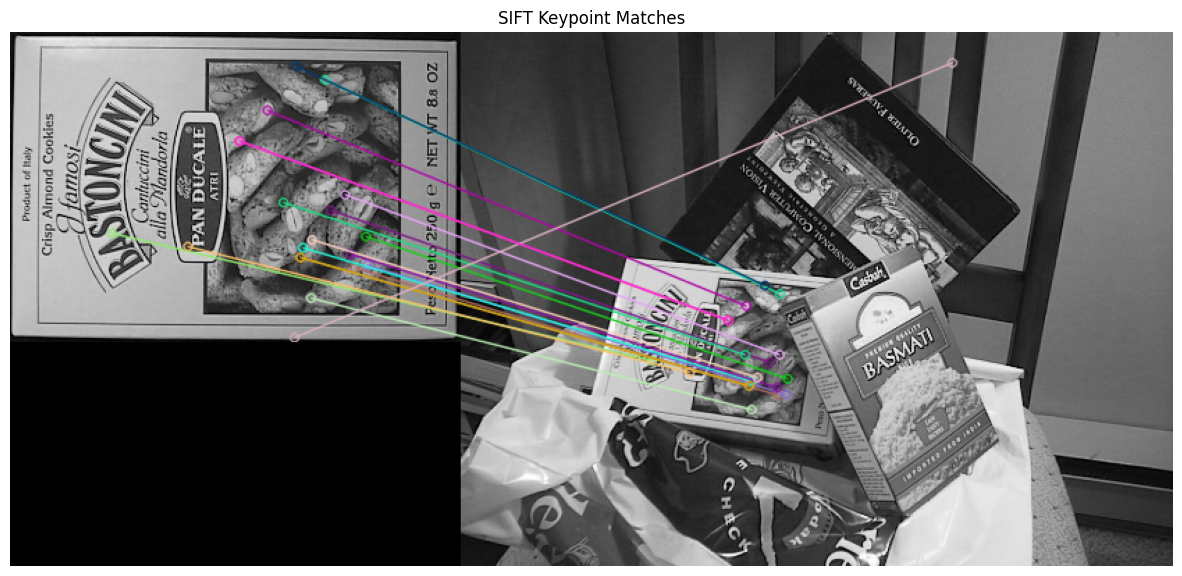

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Brute-force matcher with L2 norm
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

# Show result
plt.figure(figsize=(15, 10))
plt.title("SIFT Keypoint Matches")
plt.imshow(matched_img)
plt.axis('off')
plt.show()
